<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='green'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [ ]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW' -O 'HW4_data.zip'
!unzip HW4_data.zip

# Imports
<div dir=rtl>
<font color="green" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [ ]:
###

# ENTER YOUR CODE HERE.
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import cv2
from google.colab.patches import cv2_imshow
###

# Any Helper Functions

<div dir=rtl>
<font color="green" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [ ]:
###

# ENTER YOUR CODE HERE.

###

# Question 5: Edge Detection (15%)

(-0.5, 719.5, 719.5, -0.5)

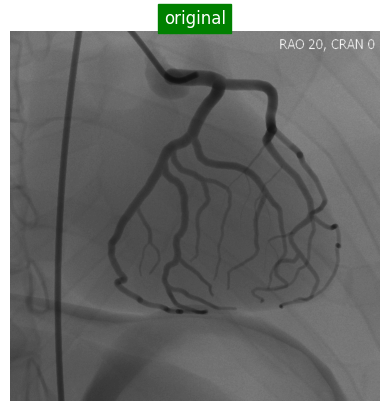

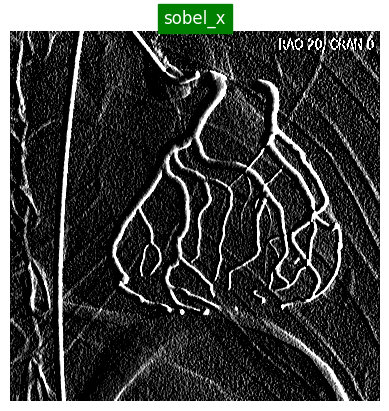

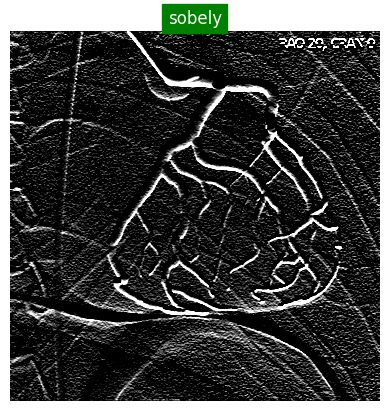

In [ ]:
#@title Q5 - Part 1 (Sobel) (5%)
###
plt.figure()
# ENTER YOUR CODE HERE.
image = cv2.imread('angio.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title('original', color='white', backgroundcolor='green')
plt.axis('off')

plt.figure()
sobel_x = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobel_x, cmap="gray", vmin=0, vmax=255)
plt.title('sobel_x', color='white', backgroundcolor='green')
plt.axis('off')


sobel_y = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

plt.figure()
plt.imshow(sobel_y, cmap="gray", vmin=0, vmax=255)
plt.title('sobel_y', color='white', backgroundcolor='green')
plt.axis('off')
###

(-0.5, 719.5, 719.5, -0.5)

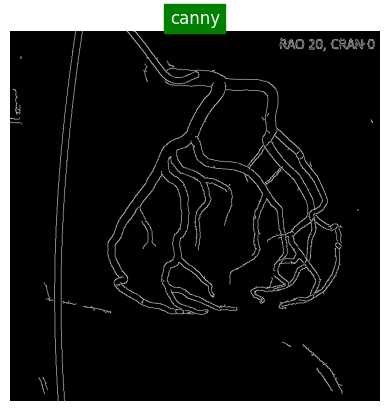

In [ ]:
#@title Q5 - Part 2 (Canny) (5%)
###

# ENTER YOUR CODE HERE.
canny = cv2.Canny(image, 30, 80)
plt.figure()
plt.imshow(canny, cmap="gray", vmin=0, vmax=255)
plt.title('canny', color='white', backgroundcolor='green')
plt.axis('off')
###

(-0.5, 719.5, 719.5, -0.5)

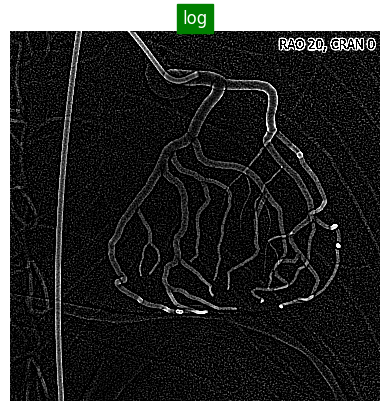

In [ ]:
#@title Q5 - Part 3 (LoG) (5%)
###

# ENTER YOUR CODE HERE.
gaussian = cv2.GaussianBlur(image, (3, 3), 0)
log = cv2.Laplacian(gaussian, cv2.CV_16S, ksize=5)
plt.figure()
plt.imshow(log, cmap="gray", vmin=0, vmax=255)
plt.title('log', color='white', backgroundcolor='green')
plt.axis('off')
###

# Question 6: Hough Transform (15%)

(-0.5, 369.5, 999.5, -0.5)

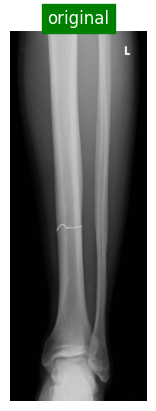

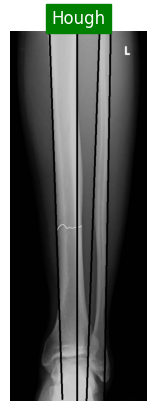

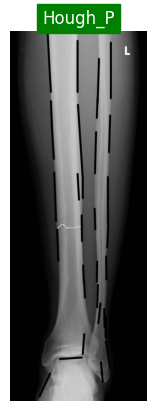

In [ ]:
#@title Q6 - Part 1 (60%)
###

# ENTER YOUR CODE HERE.

image = cv2.imread('bone.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(image,(3,3),0)
edges = cv2.Canny(image,60,60)
plt.figure()
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title('original', color='white', backgroundcolor='green')
plt.axis('off')

lines = cv2.HoughLines(edges, 1.2, numpy.pi/180, 220)

image1 =  numpy.copy(image)
for r_theta in lines:
    arr = numpy.array(r_theta[0], dtype=numpy.float64)
    r, theta = arr
    a = numpy.cos(theta)
    b = numpy.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image1, (x1, y1), (x2, y2), (0,0,255), 4)
plt.figure()
plt.imshow(image1, cmap="gray", vmin=0, vmax=255)
plt.title('Hough', color='white', backgroundcolor='green')
plt.axis('off')

edges2 = numpy.copy(edges)
linesP = cv2.HoughLinesP(edges2, 1, numpy.pi / 180, 50, None, 50, 10)
image2 =  numpy.copy(image)

if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(image2, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)


plt.figure()
plt.imshow(image2, cmap="gray", vmin=0, vmax=255)
plt.title('Hough_P', color='white', backgroundcolor='green')
plt.axis('off')
###

[[[287 207  68]]]


(-0.5, 539.5, 359.5, -0.5)

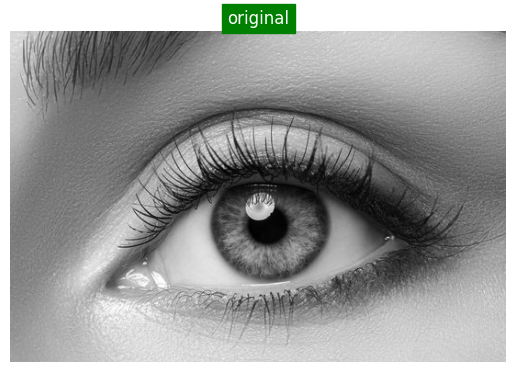

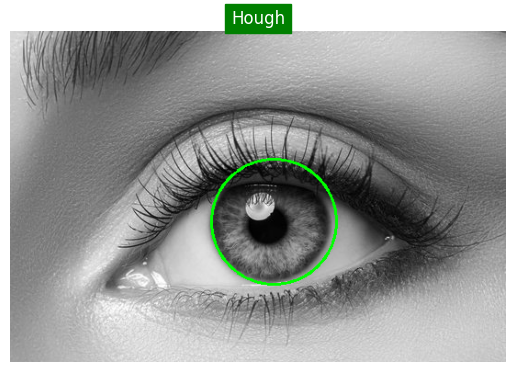

In [ ]:
#@title Q6 - Part 2 (40%)
###

# ENTER YOUR CODE HERE.
image = cv2.imread('eye.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(image,5)
cimage = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
plt.figure()
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title('original', color='white', backgroundcolor='green')
plt.axis('off')

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,2,15,param1=220,param2=120,minRadius=0,maxRadius=0)

circles = numpy.uint16(numpy.around(circles))
print(circles)
for i in circles[0,:]:
    cv2.circle(cimage,(i[0],i[1]),i[2],(0,255,0),2)
plt.figure()
plt.imshow(cimage, cmap="gray", vmin=0, vmax=255)
plt.title('Hough', color='white', backgroundcolor='green')
plt.axis('off')
###

# Question 7: Feature-Based Registration (20%)

In [ ]:
###

# ENTER YOUR CODE HERE.
x11 = 90
y11 = 112
x12 = 265
y12 = 213

x21 = 115
y21 = 81
x22 = 340
y22 = 194

x31 = 74
y31 = 137
x32 = 214
y32 = 230

A = numpy.array([[x11, y11, 1], [x21, y21, 1], [x31, y31, 1]])
b = numpy.array([[x12,y12], [x22, y22], [x32, y32]])

x = numpy.matmul(numpy.linalg.inv(A),b)

print("a = ", x)
###

(217, 181)
a =  [[  2.27906977   0.40310078]
 [ -0.58139535   0.9379845 ]
 [125.          71.66666667]]


# Question 8: Similarity-based Segmentation (20%)

In [ ]:
#@title Q8 - Part 1
###

# ENTER YOUR CODE HERE.
image = cv2.imread('Color_MRI.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
###

In [ ]:
#@title Q8 - Part 2
###

# ENTER YOUR CODE HERE.
x11 = 370
y11 = 400
x12 = 247
y12 = 271
###

In [ ]:
#@title Q8 - Part 3 (5%)
###

# ENTER YOUR CODE HERE.
new_image = numpy.zeros_like(image)
new_image[x11, y11] = image[x11, y11]
new_image[x12, y12] = image[x12, y12]
###

In [204]:
#@title Q8 - Part 4 (50%)
###
# ENTER YOUR CODE HERE.
def growing_region(image, d, type_t, seed, max_iterations=100):
    result = numpy.zeros_like(image, dtype=numpy.uint8)
    x = image[seed]
    result[seed] = x

    for _ in range(max_iterations):
        if type_t == 'static':
            threshold = x
        elif type_t == 'variable':
            threshold = numpy.mean(image[result == x])
            threshold = numpy.array([threshold,threshold,threshold])


        mask = cv2.inRange(image, threshold - d, threshold + d)
        result = cv2.bitwise_and(result, result, mask=~mask)
        result[mask > 0] = x

    return result

###

(-0.5, 830.5, 805.5, -0.5)

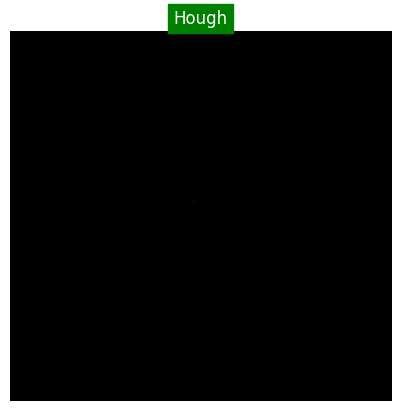

In [ ]:
#@title Q8 - Part 5 (15%)
###

# ENTER YOUR CODE HERE.

plt.figure()
plt.imshow(growing_region(new_image, 10, "static", (x11, y11), 200), cmap="gray", vmin=0, vmax=255)
plt.title('Hough', color='white', backgroundcolor='green')
plt.axis('off')
###

In [205]:
#@title Q8 - Part 6 (10%)
###
image1 = cv2.imread('Color_MRI.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('Color_MRI.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image3 = cv2.imread('Color_MRI.png')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

image4 = cv2.imread('Color_MRI.png')
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

static1 = growing_region(image1, 10, "static", (x11, y11), 200)
static2 = growing_region(image2, 10, "static", (x12, y12), 200)

variable1 = growing_region(image3, 50, "variable", (x11, y11), 200)
variable2 = growing_region(image4, 50, "variable", (x12, y12), 200)
# ENTER YOUR CODE HERE.
###

In [201]:
#@title Q8 - Part 7 (5%)
###

# ENTER YOUR CODE HERE.
print(200)
###

200


(-0.5, 830.5, 805.5, -0.5)

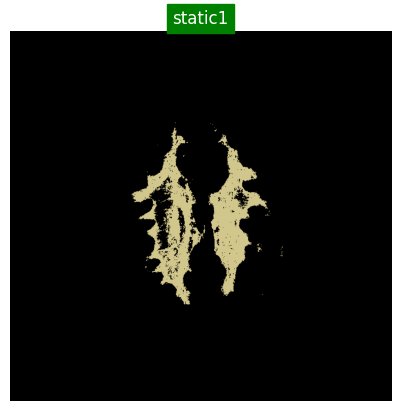

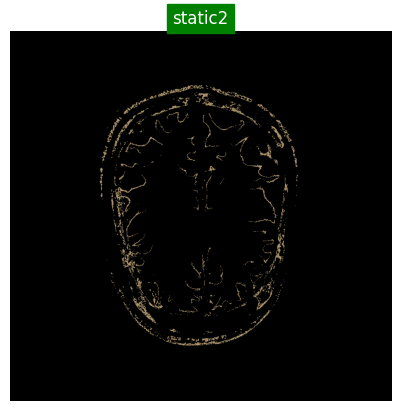

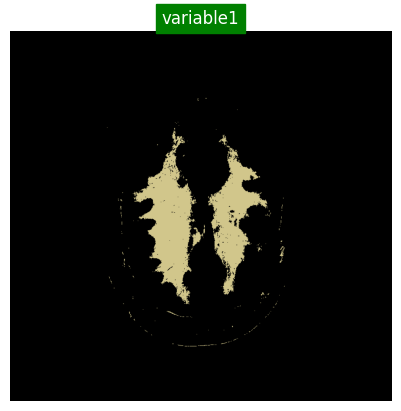

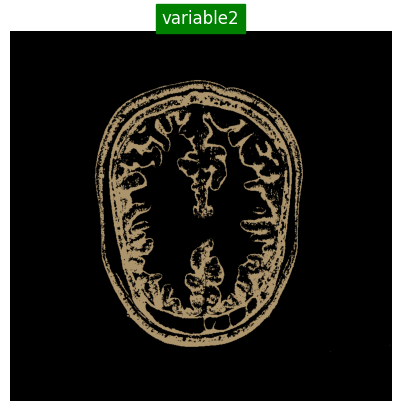

In [206]:
#@title Q8 - Part 8 (15%)
###

# ENTER YOUR CODE HERE.
plt.figure()
plt.imshow(static1, cmap="gray", vmin=0, vmax=255)
plt.title('static1', color='white', backgroundcolor='green')
plt.axis('off')

plt.figure()
plt.imshow(static2, cmap="gray", vmin=0, vmax=255)
plt.title('static2', color='white', backgroundcolor='green')
plt.axis('off')
plt.figure()

plt.imshow(variable1, cmap="gray", vmin=0, vmax=255)
plt.title('variable1', color='white', backgroundcolor='green')
plt.axis('off')
plt.figure()

plt.imshow(variable2, cmap="gray", vmin=0, vmax=255)
plt.title('variable2', color='white', backgroundcolor='green')
plt.axis('off')

###